In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [2]:
df_sd_train = pd.read_csv("Surveydata_train_(1).csv")
df_sd_test = pd.read_csv("Surveydata_test.csv")


In [77]:
df_sd_train.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [79]:
df_sd_test.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [74]:
df_sd_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_time_convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_location        94349 non-null  object
 7   Onboardwifi_service      94349 non-null  object
 8   Onboard_entertainment    94361 non-null  object
 9   Online_support           94288 non-null  object
 10  Onlinebooking_Ease       94306 non-null  object
 11  Onboard_service          86778 non-null  object
 12  Leg_room                 94289 non-null  object
 13  Baggage_handling         94237 non-null  object
 14  Checkin_service          94302 non-nul

In [80]:
df_sd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_time_convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_location        35590 non-null  object
 6   Onboardwifi_service      35590 non-null  object
 7   Onboard_entertainment    35594 non-null  object
 8   Online_support           35576 non-null  object
 9   Onlinebooking_Ease       35584 non-null  object
 10  Onboard_service          32730 non-null  object
 11  Leg_room                 35577 non-null  object
 12  Baggage_handling         35562 non-null  object
 13  Checkin_service          35580 non-null  object
 14  Cleanliness              35600 non-nul

In [81]:
df_sd_train.describe(include = 'all')


,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
count,9.437900e+04,94379.000000,94318,94379,85449,85638,94349,94349,94361,94288,94306,86778,94289,94237,94302,94373,94373
unique,NaN,NaN,6,2,6,6,6,6,6,6,6,6,6,5,6,6,6
top,NaN,NaN,acceptable,Green Car,good,acceptable,manageable,good,good,good,good,good,good,good,good,good,good
freq,NaN,NaN,21158,47435,19574,18468,24173,22835,30446,30016,28909,27265,28870,34944,26502,35427,25533
mean,9.884719e+07,0.546658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.724501e+04,0.497821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,9.880000e+07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.882360e+07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.884719e+07,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.887078e+07,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df_sd_test.describe(include = 'all')

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
count,3.560200e+04,35580,35602,32277,32245,35590,35590,35594,35576,35584,32730,35577,35562,35580,35600,35600
unique,NaN,6,2,6,6,5,6,6,5,6,5,6,5,5,5,6
top,NaN,acceptable,Ordinary,good,acceptable,manageable,good,good,good,good,good,good,good,good,good,good
freq,NaN,8003,17860,7361,7133,9364,8743,11436,11487,11025,10222,10842,13291,9982,13421,9680
mean,9.991780e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.027756e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,9.990000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.990890e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.991780e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.992670e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df_sd_train.isna().sum()


ID                            0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

In [84]:
df_sd_test.isna().sum()

ID                            0
Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
dtype: int64

In [3]:
df_td_train = pd.read_csv("Traveldata_train_(1).csv")

df_td_test = pd.read_csv("Traveldata_test.csv")


In [88]:
df_td_train.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [89]:
df_td_test.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


In [90]:
df_td_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94302 non-null  object 
 2   CustomerType            85428 non-null  object 
 3   Age                     94346 non-null  float64
 4   TypeTravel              85153 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94322 non-null  float64
 8   ArrivalDelay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [91]:
df_td_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      35602 non-null  int64  
 1   Gender                  35572 non-null  object 
 2   CustomerType            32219 non-null  object 
 3   Age                     35591 non-null  float64
 4   TypeTravel              32154 non-null  object 
 5   Travel_Class            35602 non-null  object 
 6   Travel_Distance         35602 non-null  int64  
 7   DepartureDelay_in_Mins  35573 non-null  float64
 8   ArrivalDelay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


In [94]:
df_td_train.describe(include ='all')


,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,9.437900e+04,94302,85428,94346.000000,85153,94379,94379.000000,94322.000000,94022.000000
unique,NaN,2,2,NaN,2,2,NaN,NaN,NaN
top,NaN,Female,Loyal Customer,NaN,Business travel,Eco,NaN,NaN,NaN
freq,NaN,47815,69823,NaN,58617,49342,NaN,NaN,NaN
mean,9.884719e+07,NaN,NaN,39.419647,NaN,NaN,1978.888185,14.647092,15.005222
std,2.724501e+04,NaN,NaN,15.116632,NaN,NaN,1027.961019,38.138781,38.439409
min,9.880000e+07,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000
25%,9.882360e+07,NaN,NaN,27.000000,NaN,NaN,1359.000000,0.000000,0.000000
50%,9.884719e+07,NaN,NaN,40.000000,NaN,NaN,1923.000000,0.000000,0.000000
75%,9.887078e+07,NaN,NaN,51.000000,NaN,NaN,2538.000000,12.000000,13.000000


In [93]:
df_td_test.describe(include ='all')

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,3.560200e+04,35572,32219,35591.000000,32154,35602,35602.000000,35573.000000,35479.000000
unique,NaN,2,2,NaN,2,2,NaN,NaN,NaN
top,NaN,Female,Loyal Customer,NaN,Business travel,Eco,NaN,NaN,NaN
freq,NaN,18069,26349,NaN,22313,18473,NaN,NaN,NaN
mean,9.991780e+07,NaN,NaN,39.446995,NaN,NaN,1987.151761,14.880696,15.308802
std,1.027756e+04,NaN,NaN,15.137554,NaN,NaN,1024.308863,37.895453,38.531293
min,9.990000e+07,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000
25%,9.990890e+07,NaN,NaN,27.000000,NaN,NaN,1360.000000,0.000000,0.000000
50%,9.991780e+07,NaN,NaN,40.000000,NaN,NaN,1929.000000,0.000000,0.000000
75%,9.992670e+07,NaN,NaN,51.000000,NaN,NaN,2559.000000,13.000000,13.000000


In [96]:
df_td_train.isna().sum()


ID                           0
Gender                      77
CustomerType              8951
Age                         33
TypeTravel                9226
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      57
ArrivalDelay_in_Mins       357
dtype: int64

In [95]:
df_td_test.isna().sum()

ID                           0
Gender                      30
CustomerType              3383
Age                         11
TypeTravel                3448
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      29
ArrivalDelay_in_Mins       123
dtype: int64

In [47]:
print('Number of duplicate rows = %d' % df_td_train.duplicated().sum())

Number of duplicate rows = 0


In [48]:
print('Number of duplicate rows = %d' % df_sd_train.duplicated().sum())

Number of duplicate rows = 0


In [49]:
print('Number of duplicate rows = %d' % df_td_test.duplicated().sum())

Number of duplicate rows = 0


In [50]:
print('Number of duplicate rows = %d' % df_sd_test.duplicated().sum())

Number of duplicate rows = 0


In [37]:
cat=[]
num=[]
for i in df_td_train.columns:
    if df_td_train[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['Gender', 'CustomerType', 'TypeTravel', 'Travel_Class']
['ID', 'Age', 'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins']


In [44]:
cat1=[]
num1=[]
for i in df_sd_train.columns:
    if df_sd_train[i].dtype=="object":
        cat1.append(i)
    else:
        num1.append(i)
print(cat1) 
print(num1)

['Seat_comfort', 'Seat_Class', 'Arrival_time_convenient', 'Catering', 'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment', 'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding']
['ID', 'Overall_Experience']


In [40]:
df_td_train_num=df_td_train[num]

In [45]:
df_sd_train_num=df_sd_train[num1]

<AxesSubplot:>

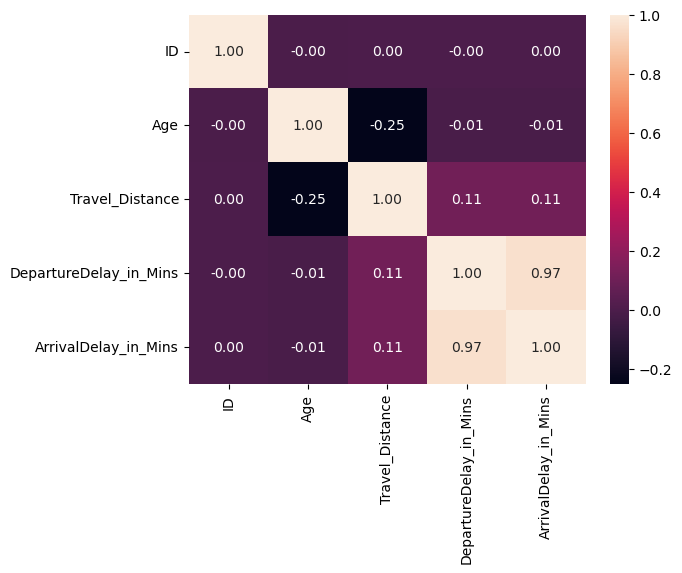

In [42]:
sns.heatmap(df_td_train_num.corr(),fmt='.2f',annot=True)

<Figure size 1500x800 with 0 Axes>

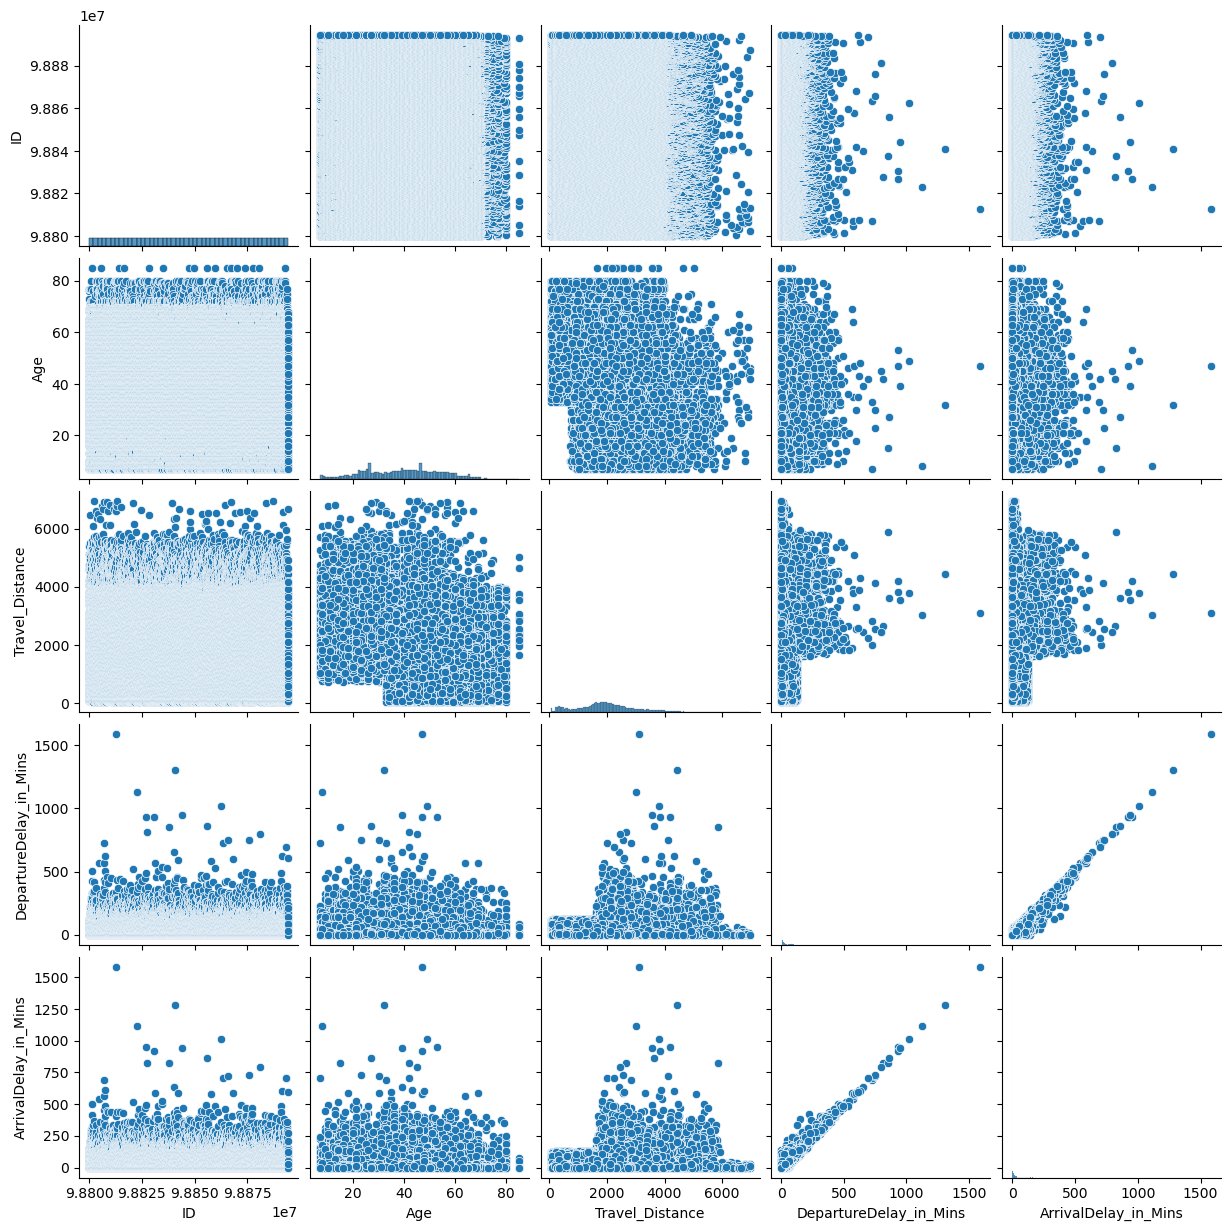

In [51]:
plt.figure(figsize=(15,8))
sns.pairplot(df_td_train)

In [4]:
#merging of  the two datasets on ID column

df_train_final = pd.merge(df_sd_train, df_td_train, on= 'ID')

df_test_final = pd.merge(df_sd_test, df_td_test, on= 'ID')


In [127]:
df_train_final.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,...,need improvement,poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,...,good,good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,...,excellent,excellent,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,...,acceptable,acceptable,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,...,good,good,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [128]:
df_test_final.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,...,excellent,poor,Female,NaN,36.0,Business travel,Business,532,0.0,0.0
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,...,excellent,acceptable,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,...,need improvement,excellent,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,...,excellent,poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,...,excellent,excellent,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0


In [129]:
df_train_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_time_convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_location        94349 non-null  object 
 7   Onboardwifi_service      94349 non-null  object 
 8   Onboard_entertainment    94361 non-null  object 
 9   Online_support           94288 non-null  object 
 10  Onlinebooking_Ease       94306 non-null  object 
 11  Onboard_service          86778 non-null  object 
 12  Leg_room                 94289 non-null  object 
 13  Baggage_handling         94237 non-null  object 
 14  Checkin_service       

In [130]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_time_convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_location        35590 non-null  object 
 6   Onboardwifi_service      35590 non-null  object 
 7   Onboard_entertainment    35594 non-null  object 
 8   Online_support           35576 non-null  object 
 9   Onlinebooking_Ease       35584 non-null  object 
 10  Onboard_service          32730 non-null  object 
 11  Leg_room                 35577 non-null  object 
 12  Baggage_handling         35562 non-null  object 
 13  Checkin_service          35580 non-null  object 
 14  Cleanliness           

In [292]:

for i in df_train_final.columns:
    print(df_train_final[i].value_counts().sort_values(ascending=False))    

98800001    1
98800015    1
98800006    1
98800007    1
98800008    1
           ..
98894376    1
98894377    1
98894378    1
98894359    1
98894379    1
Name: ID, Length: 94379, dtype: int64
1    51593
0    42786
Name: Overall_Experience, dtype: int64
acceptable          21158
need improvement    20946
good                20595
poor                15185
excellent           12971
extremely poor       3463
Name: Seat_comfort, dtype: int64
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64
good                19574
excellent           17684
acceptable          15177
need improvement    14990
poor                13692
extremely poor       4332
Name: Arrival_time_convenient, dtype: int64
acceptable          18468
need improvement    17978
good                17969
poor                13858
excellent           13455
extremely poor       3910
Name: Catering, dtype: int64
manageable           24173
Convinient           21912
need improvement     17832
Inconvinient         16

In [293]:

for i in df_test_final.columns:
    print(df_test_final[i].value_counts().sort_values(ascending=False))    

99900001    1
99900012    1
99900018    1
99900017    1
99900016    1
           ..
99935589    1
99935588    1
99935594    1
99935466    1
99935602    1
Name: ID, Length: 35602, dtype: int64
acceptable          8003
need improvement    7831
good                7808
poor                5755
excellent           4854
extremely poor      1329
Name: Seat_comfort, dtype: int64
Ordinary     17860
Green Car    17742
Name: Seat_Class, dtype: int64
good                7361
excellent           6589
acceptable          5844
need improvement    5684
poor                5131
extremely poor      1668
Name: Arrival_time_convenient, dtype: int64
acceptable          7133
need improvement    6701
good                6701
poor                5178
excellent           5025
extremely poor      1507
Name: Catering, dtype: int64
manageable          9364
Convinient          8178
need improvement    6703
Inconvinient        6134
very convinient     5211
Name: Platform_location, dtype: int64
good                

In [5]:
df_train_final['Seat_comfort'].fillna('acceptable', inplace= True)
df_test_final['Seat_comfort'].fillna('acceptable', inplace= True)


In [6]:
for i in range (4,19):
    df_train_final.iloc[:,i].fillna(df_train_final.iloc[:,i].value_counts().index[0], inplace = True)   

In [7]:
for i in range (3,18):
    df_test_final.iloc[:,i].fillna(df_test_final.iloc[:,i].value_counts().index[0], inplace = True)  

In [8]:
df_train_final['DepartureDelay_in_Mins'].fillna(df_train_final['DepartureDelay_in_Mins'].mean(), inplace = True)
df_train_final['ArrivalDelay_in_Mins'].fillna(df_train_final['ArrivalDelay_in_Mins'].mean(), inplace = True)
df_test_final['DepartureDelay_in_Mins'].fillna(df_test_final['DepartureDelay_in_Mins'].mean(), inplace = True)
df_test_final['ArrivalDelay_in_Mins'].fillna(df_test_final['ArrivalDelay_in_Mins'].mean(), inplace = True)

In [9]:
df_train_final['TypeTravel'].fillna(df_train_final['TypeTravel'].value_counts().index[0], inplace = True)

In [10]:
df_test_final['TypeTravel'].fillna(df_train_final['TypeTravel'].value_counts().index[0], inplace = True)

In [11]:
mean=df_train_final['Age'].mean()

In [12]:
mean2=df_test_final['Age'].mean()

In [13]:
df_train_final['Age'].fillna(mean, inplace=True)

In [14]:
df_test_final['Age'].fillna(mean2, inplace=True)

In [15]:
display(df_train_final.isna().sum())
display(df_test_final.isna().sum())

ID                         0
Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
dtype: int64

ID                         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
dtype: int64

# Encoding

In [16]:
df_train_final['Seat_comfort'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train_final['Arrival_time_convenient'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train_final['Catering'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train_final['Onboardwifi_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train_final['Onboard_entertainment'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train_final['Online_support'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train_final['Onlinebooking_Ease'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train_final['Onboard_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train_final['Leg_room'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train_final['Checkin_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train_final['Cleanliness'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], [5, 4, 3, 2, 1, 0], inplace = True)
df_train_final['Online_boarding'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)

In [17]:

df_train_final['Platform_location'].replace(['very convinient','Convinient','manageable','need improvement',
       'Inconvinient', 'very inconvinient'], [5,4,3,2,1,0], inplace = True)
df_train_final['Seat_Class'].replace(['Green Car', 'Ordinary'], [0,1], inplace = True)
df_train_final['Baggage_handling'].replace(['excellent','good','acceptable','need improvement','poor'], [5,4,3,2,1], inplace = True)
df_train_final['Gender'].replace(['Female', 'Male'], [0,1], inplace = True)
df_train_final['CustomerType'].replace(['Loyal Customer', 'disloyal Customer'], [0,1], inplace = True)
df_train_final['TypeTravel'].replace(['Business travel', 'Personal Travel'], [0,1], inplace = True)
df_train_final['Travel_Class'].replace(['Business', 'Eco'], [0,1], inplace = True)


In [18]:
df_test_final['Seat_comfort'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test_final['Arrival_time_convenient'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test_final['Catering'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test_final['Onboardwifi_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test_final['Onboard_entertainment'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test_final['Online_support'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test_final['Onlinebooking_Ease'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test_final['Onboard_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test_final['Leg_room'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test_final['Checkin_service'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test_final['Cleanliness'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)
df_test_final['Online_boarding'].replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor' ], [5, 4, 3, 2, 1, 0], inplace = True)

In [19]:

df_test_final['Platform_location'].replace(['very convinient','Convinient','manageable','need improvement',
       'Inconvinient', 'very inconvinient'], [5,4,3,2,1,0], inplace = True)
df_test_final['Seat_Class'].replace(['Green Car', 'Ordinary'], [0,1], inplace = True)
df_test_final['Baggage_handling'].replace(['excellent','good','acceptable','need improvement','poor'], [5,4,3,2,1], inplace = True)
df_test_final['Gender'].replace(['Female', 'Male'], [0,1], inplace = True)
df_test_final['CustomerType'].replace(['Loyal Customer', 'disloyal Customer'], [0,1], inplace = True)
df_test_final['TypeTravel'].replace(['Business travel', 'Personal Travel'], [0,1], inplace = True)
df_test_final['Travel_Class'].replace(['Business', 'Eco'], [0,1], inplace = True)

In [316]:
df_train_final.info()
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_comfort             94379 non-null  int64  
 3   Seat_Class               94379 non-null  int64  
 4   Arrival_time_convenient  94379 non-null  int64  
 5   Catering                 94379 non-null  int64  
 6   Platform_location        94379 non-null  int64  
 7   Onboardwifi_service      94379 non-null  int64  
 8   Onboard_entertainment    94379 non-null  int64  
 9   Online_support           94379 non-null  int64  
 10  Onlinebooking_Ease       94379 non-null  int64  
 11  Onboard_service          94379 non-null  int64  
 12  Leg_room                 94379 non-null  int64  
 13  Baggage_handling         94379 non-null  int64  
 14  Checkin_service       

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_comfort             35602 non-null  int64  
 2   Seat_Class               35602 non-null  int64  
 3   Arrival_time_convenient  35602 non-null  int64  
 4   Catering                 35602 non-null  int64  
 5   Platform_location        35602 non-null  int64  
 6   Onboardwifi_service      35602 non-null  int64  
 7   Onboard_entertainment    35602 non-null  int64  
 8   Online_support           35602 non-null  int64  
 9   Onlinebooking_Ease       35602 non-null  int64  
 10  Onboard_service          35602 non-null  int64  
 11  Leg_room                 35602 non-null  int64  
 12  Baggage_handling         35602 non-null  int64  
 13  Checkin_service          35602 non-null  int64  
 14  Cleanliness           

None

In [20]:
X = df_train_final.drop(['ID', 'Overall_Experience', 'DepartureDelay_in_Mins'], axis = 1)
Y = df_train_final['Overall_Experience']


In [318]:
X.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,ArrivalDelay_in_Mins
0,2,0,5,5,5,4,2,3,2,2,...,4,2,1,0,0,52.0,0,0,272,5.0
1,1,1,5,1,2,4,1,4,4,5,...,2,4,4,1,0,48.0,1,1,2200,0.0
2,2,0,2,2,2,2,4,5,5,5,...,4,5,5,0,0,43.0,0,0,1061,119.0
3,3,1,2,3,2,3,2,3,3,3,...,4,3,3,0,0,44.0,0,0,780,18.0
4,3,1,3,3,3,2,4,5,4,4,...,4,4,4,0,0,50.0,0,0,1981,0.0


In [319]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Overall_Experience, dtype: int64

In [21]:

X_test = df_test_final.drop(['ID', 'DepartureDelay_in_Mins'], axis = 1)

In [321]:
X_test.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,ArrivalDelay_in_Mins
0,3,0,3,3,3,2,5,4,5,5,...,4,5,1,0,0,36.0,0,0,532,0.0
1,0,1,4,1,3,3,1,3,3,5,...,3,5,3,0,1,21.0,0,0,1425,28.0
2,5,1,5,5,5,5,5,5,2,2,...,4,2,5,1,0,60.0,0,0,2832,0.0
3,3,0,5,3,5,1,3,5,1,3,...,5,5,1,0,0,29.0,1,1,1352,0.0
4,5,1,0,5,2,5,5,5,5,4,...,5,5,5,1,1,18.0,0,0,1610,0.0


In [22]:
# Scaling 
from scipy.stats import zscore
df_scaled = X.apply(zscore)


In [323]:
df_scaled.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,ArrivalDelay_in_Mins
0,-0.602903,-0.994811,1.288950,1.549973,1.536013,0.569615,-1.027150,-0.397449,-1.126732,-1.235539,...,0.521510,-1.479319,-1.811942,-0.985222,-0.445082,0.832369,-0.625411,-1.046703,-1.660469,-0.260781
1,-1.321256,1.005216,1.288950,-1.356788,-0.757533,0.569615,-1.770047,0.367298,0.405697,1.213628,...,-1.065885,0.256872,0.499265,1.014999,-0.445082,0.567712,1.598950,0.955380,0.215099,-0.391103
2,-0.602903,-0.994811,-0.735667,-0.630097,-0.757533,-0.946258,0.458644,1.132046,1.171912,1.213628,...,0.521510,1.124967,1.269667,-0.985222,-0.445082,0.236891,-0.625411,-1.046703,-0.892926,2.710567
3,0.115449,1.005216,-0.735667,0.096593,-0.757533,-0.188322,-1.027150,-0.397449,-0.360518,-0.419150,...,0.521510,-0.611223,-0.271137,-0.985222,-0.445082,0.303056,-0.625411,-1.046703,-1.166284,0.078057
4,0.115449,1.005216,-0.060795,0.096593,0.006983,-0.946258,0.458644,1.132046,0.405697,0.397239,...,0.521510,0.256872,0.499265,-0.985222,-0.445082,0.700041,-0.625411,-1.046703,0.002054,-0.391103


In [25]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df_scaled, Y, test_size= 0.20, random_state=1)

display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(75503, 22)

(18876, 22)

(75503,)

(18876,)

# Model Building using Decsion Tree

In [230]:
dTree1 = DecisionTreeClassifier(random_state =1, max_depth=15, min_samples_split= 50, min_samples_leaf = 10)
dTree1.fit(X_train , Y_train)
y_predict = dTree1.predict(X_train)
print(accuracy_score(Y_train, y_predict))



0.9478166430472962


In [231]:
print(classification_report(Y_train, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     34188
           1       0.96      0.95      0.95     41315

    accuracy                           0.95     75503
   macro avg       0.95      0.95      0.95     75503
weighted avg       0.95      0.95      0.95     75503



In [244]:
dTree1 = DecisionTreeClassifier(random_state =1, max_depth=15, min_samples_split= 50, min_samples_leaf = 10)
dTree1.fit(X_train , Y_train)
y_predict = dTree1.predict(X_test)
print(accuracy_score(Y_test, y_predict))

0.9374337783428692


In [245]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      8598
           1       0.95      0.94      0.94     10278

    accuracy                           0.94     18876
   macro avg       0.94      0.94      0.94     18876
weighted avg       0.94      0.94      0.94     18876



# Model Building using Random Forest

In [329]:
rf = RandomForestClassifier(n_estimators=300, max_depth= 20, max_features= 15, random_state = 1)
rf.fit(X_train , Y_train)
y_predict = rf.predict(X_train)
print(accuracy_score(Y_train, y_predict))

0.9965564282213952


In [271]:
print(classification_report(Y_train, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34188
           1       1.00      0.99      1.00     41315

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



In [272]:
rf = RandomForestClassifier(n_estimators=300, max_depth= 20, max_features= 15, random_state = 1)
rf.fit(X_train , Y_train)
y_predict = rf.predict(X_test)
print(accuracy_score(Y_test, y_predict))

0.9537507946598855


In [273]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8598
           1       0.96      0.95      0.96     10278

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



# Model Building using Bagging

In [262]:
bgcl = BaggingClassifier(random_state=1)
bgcl.fit(X_train , Y_train)
y_predict = bgcl.predict(X_train)
print(accuracy_score(Y_train, y_predict))

0.996384249632465


In [263]:
print(classification_report(Y_train, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34188
           1       1.00      0.99      1.00     41315

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



In [264]:
bgcl = BaggingClassifier(random_state=1)
bgcl.fit(X_train , Y_train)
y_predict = bgcl.predict(X_test)
print(accuracy_score(Y_test, y_predict))

0.944850603941513


In [265]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8598
           1       0.96      0.94      0.95     10278

    accuracy                           0.94     18876
   macro avg       0.94      0.95      0.94     18876
weighted avg       0.95      0.94      0.94     18876



In [266]:
bgcl1 = BaggingClassifier(base_estimator=dTree1, n_estimators=50, random_state=1, max_features= 10)
bgcl1.fit(X_train , Y_train)
y_predict = bgcl1.predict(X_train)
print(accuracy_score(Y_train, y_predict))

0.9478696210746593


In [267]:
print(classification_report(Y_train, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     34188
           1       0.95      0.95      0.95     41315

    accuracy                           0.95     75503
   macro avg       0.95      0.95      0.95     75503
weighted avg       0.95      0.95      0.95     75503



In [268]:
bgcl1 = BaggingClassifier(base_estimator=dTree1, n_estimators=50, random_state=1, max_features= 10)
bgcl1.fit(X_train , Y_train)
y_predict = bgcl1.predict(X_test)
print(accuracy_score(Y_test, y_predict))

0.9382284382284383


In [269]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8598
           1       0.94      0.94      0.94     10278

    accuracy                           0.94     18876
   macro avg       0.94      0.94      0.94     18876
weighted avg       0.94      0.94      0.94     18876



# Model Building using Gradient Boosting

In [26]:
grad = GradientBoostingClassifier(random_state= 1, n_estimators=100)
grad.fit(X_train , Y_train)
y_predict = grad.predict(X_train)
print(accuracy_score(Y_train, y_predict))

0.9201886017774128


In [27]:
print(classification_report(Y_train, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     34224
           1       0.93      0.93      0.93     41279

    accuracy                           0.92     75503
   macro avg       0.92      0.92      0.92     75503
weighted avg       0.92      0.92      0.92     75503



In [28]:
grad = GradientBoostingClassifier(random_state= 1, n_estimators=100)
grad.fit(X_train , Y_train)
y_predict = grad.predict(X_test)
print(accuracy_score(Y_test, y_predict))

0.9174613265522357


In [29]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      8562
           1       0.93      0.92      0.92     10314

    accuracy                           0.92     18876
   macro avg       0.92      0.92      0.92     18876
weighted avg       0.92      0.92      0.92     18876



# Model Building using Ada Boosting

In [330]:
ada1 = AdaBoostClassifier(base_estimator=rf, n_estimators=50, random_state= 1)
ada1.fit(X_train , Y_train)
y_predict = ada1.predict(X_train)
print(accuracy_score(Y_train, y_predict))

0.9992980411374383


In [255]:
print(classification_report(Y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34188
           1       1.00      1.00      1.00     41315

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



In [256]:
ada1 = AdaBoostClassifier(base_estimator=rf, n_estimators=50, random_state= 1)
ada1.fit(X_train , Y_train)
y_predict = ada1.predict(X_test)
print(accuracy_score(Y_test, y_predict))

0.9551282051282052


In [257]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8598
           1       0.97      0.95      0.96     10278

    accuracy                           0.96     18876
   macro avg       0.95      0.96      0.95     18876
weighted avg       0.96      0.96      0.96     18876



In [258]:
ada2 = AdaBoostClassifier(base_estimator=dTree, n_estimators=50, random_state= 1)
ada2.fit(X_train , Y_train)
y_predict = ada2.predict(X_train)
print(accuracy_score(Y_train, y_predict))

1.0


In [259]:
print(classification_report(Y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34188
           1       1.00      1.00      1.00     41315

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



In [260]:
ada2 = AdaBoostClassifier(base_estimator=dTree, n_estimators=50, random_state= 1)
ada2.fit(X_train , Y_train)
y_predict = ada2.predict(X_test)
print(accuracy_score(Y_test, y_predict))

0.9388641661368934


In [261]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8598
           1       0.95      0.94      0.94     10278

    accuracy                           0.94     18876
   macro avg       0.94      0.94      0.94     18876
weighted avg       0.94      0.94      0.94     18876



# Model Building using Guassian Naive

In [250]:
nb = GaussianNB()
nb.fit(X_train , Y_train)
y_predict = nb.predict(X_train)
print(accuracy_score(Y_train, y_predict))

0.8193449266916546


In [251]:
print(classification_report(Y_train, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     34188
           1       0.83      0.84      0.84     41315

    accuracy                           0.82     75503
   macro avg       0.82      0.82      0.82     75503
weighted avg       0.82      0.82      0.82     75503



In [252]:
nb = GaussianNB()
nb.fit(X_train , Y_train)
y_predict = nb.predict(X_test)
print(accuracy_score(Y_test, y_predict))

0.8172282263191354


In [253]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8598
           1       0.83      0.83      0.83     10278

    accuracy                           0.82     18876
   macro avg       0.82      0.82      0.82     18876
weighted avg       0.82      0.82      0.82     18876



# Model Building using Logistic Regression

In [33]:
lr = LogisticRegression(random_state= 1, penalty='l2', tol=0.0001)
lr.fit(X_train , Y_train)
y_predict = lr.predict(X_train)
print(accuracy_score(Y_train, y_predict))

0.8317815186151544


In [34]:
print(classification_report(Y_train, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     34224
           1       0.84      0.85      0.85     41279

    accuracy                           0.83     75503
   macro avg       0.83      0.83      0.83     75503
weighted avg       0.83      0.83      0.83     75503



In [35]:
lr = LogisticRegression(random_state= 1, penalty='l2', tol=0.0001)
lr.fit(X_train , Y_train)
y_predict = lr.predict(X_test)
print(accuracy_score(Y_test, y_predict))


0.832591650773469


In [249]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      8598
           1       0.84      0.85      0.85     10278

    accuracy                           0.83     18876
   macro avg       0.83      0.83      0.83     18876
weighted avg       0.83      0.83      0.83     18876



<AxesSubplot:ylabel='features'>

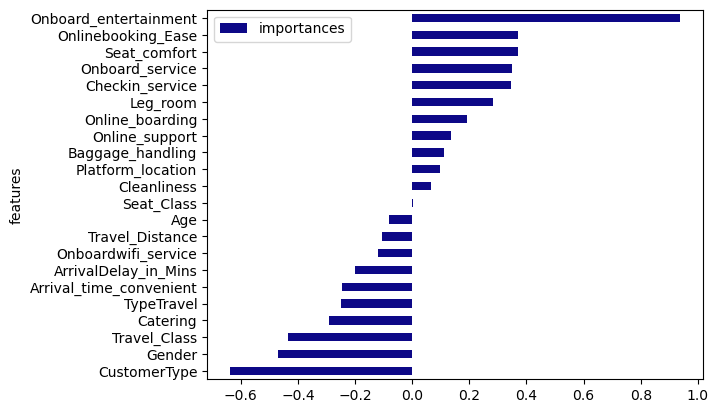

In [36]:
feat=pd.DataFrame({'features':X_train.columns,'importances':lr.coef_[0]})
feat.sort_values('importances',inplace=True)
feat.plot(kind='barh',y='importances',x='features',colormap='plasma')

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# initiantiate learning model (k = 9)
KNN_model9=KNeighborsClassifier(n_neighbors = 9)

# fitting the model
KNN_model9.fit(X_train,Y_train)

# predict the response
y_test_predict = KNN_model9.predict(X_test)
y_train_predict = KNN_model9.predict(X_train)




;


In [55]:
print("Accuracy Score for K=9 Test Data is  ", round(KNN_model9.score(X_test, Y_test),2));
print("Accuracy Score for K=9 Train data is  ", round(KNN_model9.score(X_train, Y_train),2));

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score for K=9 Test Data is   0.91


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score for K=9 Train data is   0.93


In [57]:

print(classification_report(Y_test, y_test_predict));
print(classification_report(Y_train, y_train_predict));

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      8562
           1       0.94      0.90      0.92     10314

    accuracy                           0.91     18876
   macro avg       0.91      0.91      0.91     18876
weighted avg       0.91      0.91      0.91     18876

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     34224
           1       0.95      0.92      0.93     41279

    accuracy                           0.93     75503
   macro avg       0.93      0.93      0.93     75503
weighted avg       0.93      0.93      0.93     75503



# Model Building using LDA

In [28]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train , Y_train)
y_predict = clf.predict(X_train)
print(accuracy_score(Y_train, y_predict))

0.8329602797239845


In [29]:
print(classification_report(Y_train, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     34224
           1       0.84      0.85      0.85     41279

    accuracy                           0.83     75503
   macro avg       0.83      0.83      0.83     75503
weighted avg       0.83      0.83      0.83     75503



In [30]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train , Y_train)
y_predict = clf.predict(X_test)
print(accuracy_score(Y_test, y_predict))

0.8333333333333334


In [31]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      8562
           1       0.84      0.85      0.85     10314

    accuracy                           0.83     18876
   macro avg       0.83      0.83      0.83     18876
weighted avg       0.83      0.83      0.83     18876



<AxesSubplot:ylabel='features'>

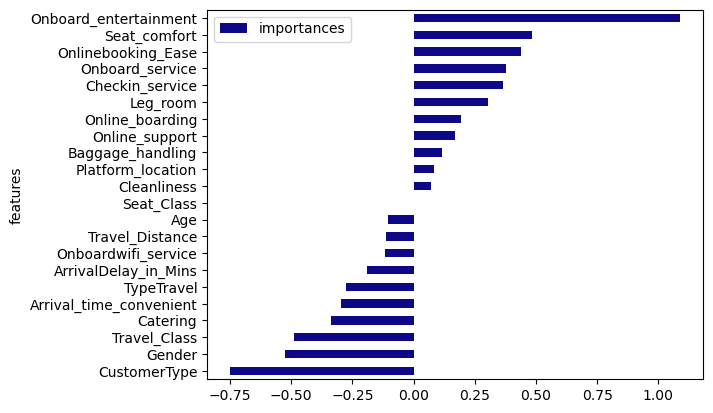

In [32]:
feat=pd.DataFrame({'features':X_train.columns,'importances':clf.coef_[0]})
feat.sort_values('importances',inplace=True)
feat.plot(kind='barh',y='importances',x='features',colormap='plasma')

# Prediction on Test Data using Ada Boosting and Random Forest Models

In [23]:


df_test_scaled = X_test.apply(zscore)


In [24]:
df_test_scaled.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,ArrivalDelay_in_Mins
0,0.117190,-1.003320,-0.055289,0.098743,0.008010,-0.950595,1.200083,0.367859,1.166951,1.218455,...,0.524797,1.119469,-1.810575,-0.983397,-0.444331,-0.227750,-0.618071,-1.038491,-1.420638,-0.398002
1,-2.036384,0.996691,0.620210,-1.357833,0.008010,-0.191237,-1.773978,-0.400356,-0.365284,1.218455,...,-0.268504,1.119469,-0.272589,-0.983397,2.250573,-1.218830,-0.618071,-1.038491,-0.548819,0.329949
2,1.552905,0.996691,1.295708,1.555318,1.545325,1.327480,1.200083,1.136075,-1.131402,-1.216905,...,0.524797,-1.487499,1.265398,1.016883,-0.444331,1.357978,-0.618071,-1.038491,0.824810,-0.398002
3,0.117190,-1.003320,1.295708,0.098743,1.545325,-1.709954,-0.286947,1.136075,-1.897520,-0.405118,...,1.318099,1.119469,-1.810575,-0.983397,-0.444331,-0.690254,1.617938,0.962936,-0.620087,-0.398002
4,1.552905,0.996691,-2.081785,1.555318,-0.760648,1.327480,1.200083,1.136075,1.166951,0.406669,...,1.318099,1.119469,1.265398,1.016883,2.250573,-1.417046,-0.618071,-1.038491,-0.368206,-0.398002


In [327]:
#####Using ADA Boosting
df_result = df_test_final.copy()


In [331]:
pred_values = ada1.predict(df_test_scaled)
df_result['Overall_Experience'] = pred_values



In [332]:
Model1 = df_result[['ID', 'Overall_Experience']]
Model1.to_csv('Model1.csv')

In [226]:
#####Using random Forest

pred_values = rf.predict(df_test_scaled)
df_result['Overall_Experience'] = pred_values


In [228]:
Model2 = df_result[['ID', 'Overall_Experience']]
Model2.to_csv('Model2.csv')